In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import math

# Google Drive 마운트
drive.mount('/content/drive')

# 직선의 기울기 계산 함수
def calculate_slope(x1, y1, x2, y2):
    return (y2 - y1) / (x2 - x1)

# 모든 직선에 대해 수평선과의 각도를 계산하는 함수
def calculate_angles(x_coords, y_coords):
    angles = []
    for i in range(10):  # 1-11, 2-12, ... 10-20 형태로 직선을 연결
        slope = calculate_slope(x_coords[i], y_coords[i], x_coords[i + 11], y_coords[i + 11])
        angle_radians = np.arctan(slope)  # 기울기를 기반으로 수평선과의 각도 계산
        angle_degrees = np.degrees(angle_radians)  # 도(degree) 단위로 변환
        angles.append(angle_degrees)
    return angles

# CSV에서 좌표 데이터를 불러오는 함수
def read_csv_for_coordinates(c_path):
    df1 = pd.read_csv(c_path, sep=',', header=None)
    x_coords = list(df1[0]) + list(df1[2])  # (A 좌표들 + C 좌표들)
    y_coords = list(df1[1]) + list(df1[3])  # (B 좌표들 + D 좌표들)
    return x_coords, y_coords


# 모든 이미지 파일에 대해 각도를 계산하는 함수
def process_images_and_calculate_angles(image_folder, csv_folder):
    result = {}
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg"):
            img_path = os.path.join(image_folder, filename)
            csv_name = filename.replace('.jpg', '.csv')
            c_path = os.path.join(csv_folder, csv_name)

            if os.path.exists(c_path):  # CSV 파일이 존재할 때만 처리
                x_coords, y_coords = read_csv_for_coordinates(c_path)
                angles = calculate_angles(x_coords, y_coords)
                max_angle = max(angles)
                min_angle = min(angles)
                angle_difference = max_angle - min_angle

                # 결과 저장 (파일 이름: 각도)
                result[filename] = angle_difference
            else:
                print(f"CSV 파일이 존재하지 않습니다: {c_path}")

    return result

# Google Drive의 AP 폴더 경로 설정
image_folder = '/content/drive/My Drive/LA/'  # Google Drive의 LA 폴더 경로
csv_folder = '/content/drive/My Drive/LA/'  # CSV 파일이 있는 동일한 폴더 경로

# 각도 계산 함수 실행
angles_dict = process_images_and_calculate_angles(image_folder, csv_folder)

# 각도 결과 출력
for filename, angle in angles_dict.items():
    print(f"{filename}: {angle:.2f}도")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0011-F-063Y1.jpg: 25.67도
0013-M-022Y1.jpg: 60.64도
0007-F-006Y1.jpg: 41.39도
0014-F-062Y1.jpg: 27.48도
0004-F-010Y1.jpg: 53.64도
0006-F-031Y1.jpg: 55.75도
0005-F-025Y1.jpg: 44.95도
0008-M-022Y1.jpg: 27.13도
0015-M-020Y1.jpg: 48.56도
0003-F-013Y1.jpg: 44.27도
0012-F-013Y1.jpg: 44.49도
0009-F-038Y1.jpg: 43.63도
0001-F-037Y1.jpg: 28.19도
0010-F-037Y1.jpg: 52.54도
0023-F-014Y1.jpg: 48.57도
0024-F-014Y1.jpg: 43.27도
0021-F-079Y1.jpg: 44.53도
0029-M-019Y1.jpg: 63.05도
0017-F-040Y1.jpg: 37.55도
0031-F-014Y1.jpg: 40.28도
0032-F-007Y1.jpg: 37.50도
0033-F-023Y1.jpg: 57.11도
0025-F-015Y1.jpg: 46.64도
0016-F-023Y1.jpg: 37.31도
0026-F-029Y1.jpg: 53.98도
0022-M-006Y1.jpg: 33.98도
0028-F-041Y1.jpg: 44.44도
0018-F-020Y1.jpg: 36.18도
0019-F-015Y1.jpg: 39.61도
0020-M-030Y1.jpg: 48.40도
0048-F-020Y1.jpg: 46.60도
0049-F-013Y1.jpg: 29.65도
0047-F-023Y1.jpg: 66.46도
0035-M-026Y1.jpg: 33.56도
0036-F-016Y1.jpg: 50.

In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import math

# Google Drive 마운트
drive.mount('/content/drive')

# 직선의 기울기 계산 함수
def calculate_slope(x1, y1, x2, y2):
    if x2 - x1 != 0:  # x 좌표가 같은 경우 기울기를 계산할 수 없으므로 처리
        return (y2 - y1) / (x2 - x1)
    else:
        return np.inf  # 수직선의 경우 기울기를 무한대로 설정

# 1번과 11번 직선, 10번과 20번 직선 간의 각도 계산
def calculate_angle_between_two_lines(x_coords, y_coords):
    # 1번 점과 11번 점 연결한 직선의 기울기 계산
    slope_1_11 = calculate_slope(x_coords[0], y_coords[0], x_coords[10], y_coords[10])

    # 10번 점과 20번 점 연결한 직선의 기울기 계산
    slope_10_20 = calculate_slope(x_coords[9], y_coords[9], x_coords[19], y_coords[19])

    # 두 직선 사이의 각도 계산
    if slope_1_11 != np.inf and slope_10_20 != np.inf:
        angle_radians = np.arctan(abs((slope_10_20 - slope_1_11) / (1 + slope_1_11 * slope_10_20)))
        angle_degrees = np.degrees(angle_radians)
        return angle_degrees
    else:
        return 90  # 수직선이 있는 경우 두 직선이 수직인 것으로 처리 (90도)

# CSV에서 좌표 데이터를 불러오는 함수
def read_csv_for_coordinates(c_path):
    df1 = pd.read_csv(c_path, sep=',', header=None)
    x_coords = list(df1[0]) + list(df1[2])  # (A 좌표들 + C 좌표들)
    y_coords = list(df1[1]) + list(df1[3])  # (B 좌표들 + D 좌표들)
    return x_coords, y_coords

# 모든 이미지 파일에 대해 각도를 계산하는 함수
def process_images_and_calculate_angles(image_folder, csv_folder):
    result = {}
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg"):
            img_path = os.path.join(image_folder, filename)
            csv_name = filename.replace('.jpg', '.csv')
            c_path = os.path.join(csv_folder, csv_name)

            if os.path.exists(c_path):  # CSV 파일이 존재할 때만 처리
                x_coords, y_coords = read_csv_for_coordinates(c_path)
                angle = calculate_angle_between_two_lines(x_coords, y_coords)

                # 결과 저장 (파일 이름: 각도)
                result[filename] = angle
            else:
                print(f"CSV 파일이 존재하지 않습니다: {c_path}")

    return result

# Google Drive의 AP 폴더 경로 설정
image_folder = '/content/drive/My Drive/LA/'  # Google Drive의 LA 폴더 경로
csv_folder = '/content/drive/My Drive/LA/'  # CSV 파일이 있는 동일한 폴더 경로

# 각도 계산 함수 실행
angles_dict = process_images_and_calculate_angles(image_folder, csv_folder)

# 각도 결과 출력
for filename, angle in angles_dict.items():
    print(f"{filename}: {angle:.2f}도")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mounted at /content/drive
Processing 0011-F-063Y1.jpg


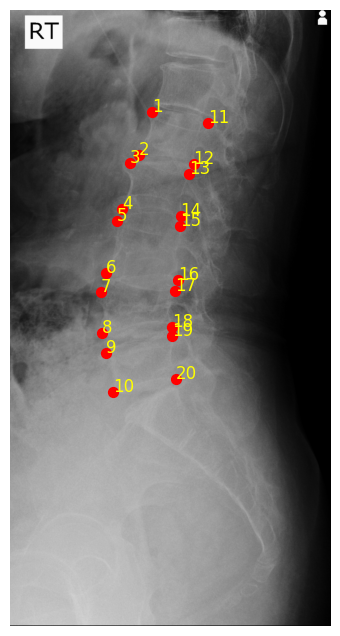

Processing 0013-M-022Y1.jpg


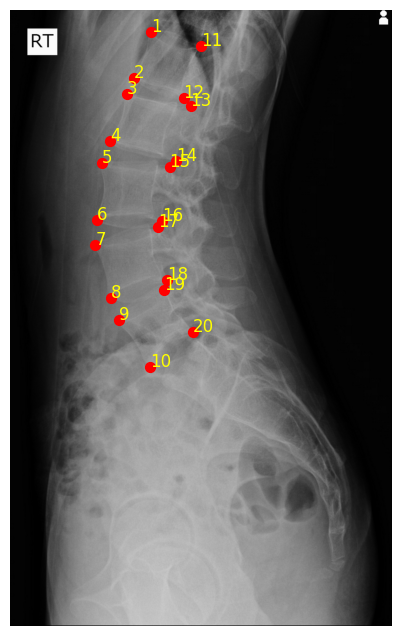

Processing 0007-F-006Y1.jpg


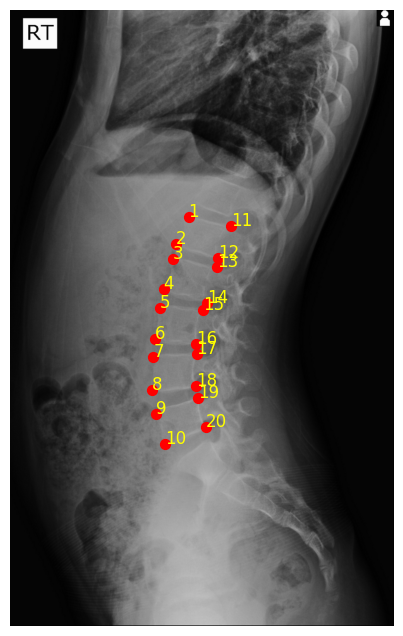

Processing 0014-F-062Y1.jpg


KeyboardInterrupt: 

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')

# CSV에서 좌표 데이터를 불러오는 함수 (마지막 row는 무시)
def read_csv_for_coordinates(c_path):
    df1 = pd.read_csv(c_path, sep=',', header=None)
    df1 = df1.iloc[:-1, :]  # 마지막 row 무시
    x_coords = list(df1[0]) + list(df1[2])  # (A 좌표들 + C 좌표들)
    y_coords = list(df1[1]) + list(df1[3])  # (B 좌표들 + D 좌표들)
    return x_coords, y_coords

# 이미지와 좌표 데이터를 이용해 점 찍기
def plot_image_with_points(image_path, x_coords, y_coords):
    # 이미지 로드
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR에서 RGB로 변환

    # 이미지 시각화
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)

    # 이미지 위에 좌표 찍기 (빨간색 점으로 시각화)
    plt.scatter(x_coords, y_coords, c='red', s=50)  # s는 점 크기, c는 색상

    # 좌표 확인을 위해 번호 표시
    for i, (x, y) in enumerate(zip(x_coords, y_coords)):
        plt.text(x, y, str(i+1), color="yellow", fontsize=12)

    # 시각화 결과 출력
    plt.axis('off')
    plt.show()

# 모든 이미지 파일에 대해 점 찍기
def process_images_and_plot(image_folder, csv_folder):
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg"):
            img_path = os.path.join(image_folder, filename)
            csv_name = filename.replace('.jpg', '.csv')
            c_path = os.path.join(csv_folder, csv_name)

            if os.path.exists(c_path):  # CSV 파일이 존재할 때만 처리
                x_coords, y_coords = read_csv_for_coordinates(c_path)
                print(f"Processing {filename}")
                plot_image_with_points(img_path, x_coords, y_coords)
            else:
                print(f"CSV 파일이 존재하지 않습니다: {c_path}")

# Google Drive의 LA 폴더 경로 설정
image_folder = '/content/drive/My Drive/LA/'  # Google Drive의 LA 폴더 경로
csv_folder = '/content/drive/My Drive/LA/'  # CSV 파일이 있는 동일한 폴더 경로

# 이미지와 좌표 데이터를 시각화
process_images_and_plot(image_folder, csv_folder)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing 0011-F-063Y1.jpg


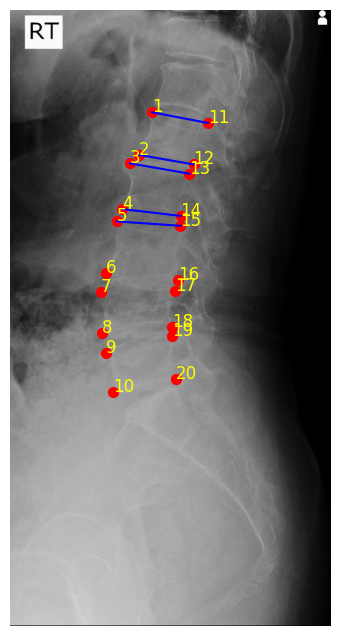

L1: 0.78도
L2: 0.15도
L3: 3.17도
L4: 2.77도
L5: 1.45도
Processing 0013-M-022Y1.jpg


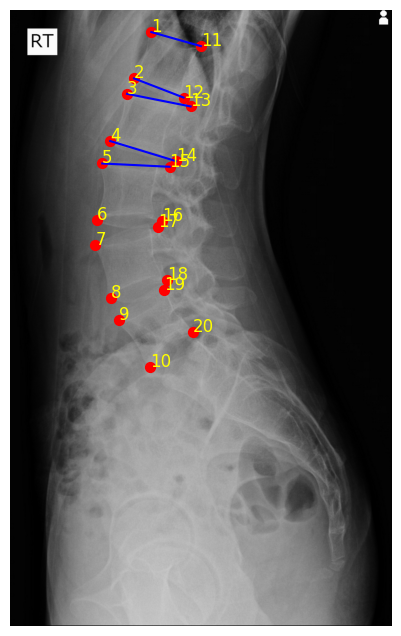

L1: 5.34도
L2: 9.92도
L3: 5.73도
L4: 14.18도
L5: 2.37도
Processing 0007-F-006Y1.jpg


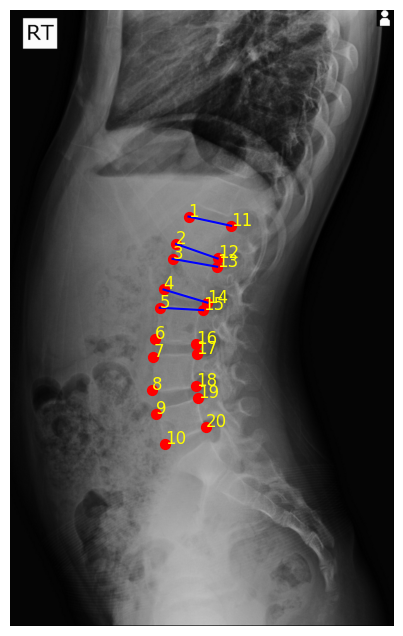

L1: 7.09도
L2: 9.22도
L3: 6.61도
L4: 13.52도
L5: 3.48도
Processing 0014-F-062Y1.jpg


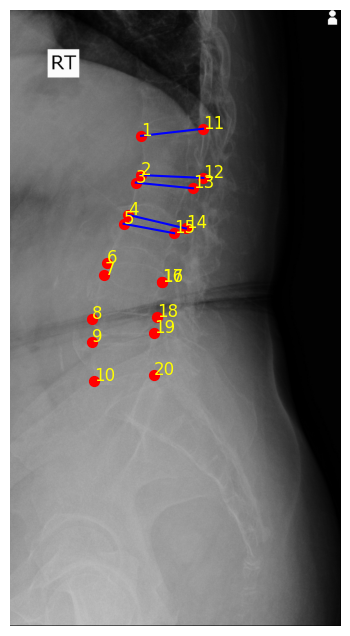

L1: 9.12도
L2: 3.08도
L3: 7.60도
L4: 2.68도
L5: 8.57도
Processing 0004-F-010Y1.jpg


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')

# 직선의 기울기 계산 함수
def calculate_slope(x1, y1, x2, y2):
    if x2 - x1 != 0:  # x 좌표가 같은 경우 기울기를 계산할 수 없으므로 처리
        return (y2 - y1) / (x2 - x1)
    else:
        return np.inf  # 수직선의 경우 기울기를 무한대로 설정

# 두 직선 사이의 각도 계산 함수
def calculate_angle_between_two_lines(slope1, slope2):
    if slope1 != np.inf and slope2 != np.inf:
        angle_radians = np.arctan(abs((slope2 - slope1) / (1 + slope1 * slope2)))
        angle_degrees = np.degrees(angle_radians)
        return angle_degrees
    else:
        return 90  # 수직선이 있는 경우 두 직선이 수직인 것으로 처리 (90도)

# CSV에서 좌표 데이터를 불러오는 함수 (마지막 row는 무시)
def read_csv_for_coordinates(c_path):
    df1 = pd.read_csv(c_path, sep=',', header=None)
    df1 = df1.iloc[:-1, :]  # 마지막 row 무시
    x_coords = list(df1[0]) + list(df1[2])  # (A 좌표들 + C 좌표들)
    y_coords = list(df1[1]) + list(df1[3])  # (B 좌표들 + D 좌표들)
    return x_coords, y_coords

# 이미지와 좌표 데이터를 이용해 직선 그리기 및 각도 계산
def plot_image_with_points_and_lines(image_path, x_coords, y_coords):
    # 이미지 로드
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR에서 RGB로 변환

    # 이미지 시각화
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)

    # 이미지 위에 좌표 찍기 (빨간색 점으로 시각화)
    plt.scatter(x_coords, y_coords, c='red', s=50)  # s는 점 크기, c는 색상

    # 좌표 확인을 위해 번호 표시
    for i, (x, y) in enumerate(zip(x_coords, y_coords)):
        plt.text(x, y, str(i+1), color="yellow", fontsize=12)

    # 직선 그리기
    # 1-11, 2-12, 3-13, ..., 9-19, 10-20 직선 그리기
    for i in range(10):
        plt.plot([x_coords[i], x_coords[i + 10]], [y_coords[i], y_coords[i + 10]], 'blue')

    # 시각화 결과 출력
    plt.axis('off')
    plt.show()

    # 각도 계산
    angles = []
    for i in range(5):
        slope1 = calculate_slope(x_coords[i], y_coords[i], x_coords[i + 10], y_coords[i + 10])
        slope2 = calculate_slope(x_coords[i + 1], y_coords[i + 1], x_coords[i + 11], y_coords[i + 11])
        angle = calculate_angle_between_two_lines(slope1, slope2)
        angles.append(angle)

    return angles

# 모든 이미지 파일에 대해 점 찍기와 각도 계산
def process_images_and_plot(image_folder, csv_folder):
    angle_results = []

    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg"):
            img_path = os.path.join(image_folder, filename)
            csv_name = filename.replace('.jpg', '.csv')
            c_path = os.path.join(csv_folder, csv_name)

            if os.path.exists(c_path):  # CSV 파일이 존재할 때만 처리
                x_coords, y_coords = read_csv_for_coordinates(c_path)
                print(f"Processing {filename}")
                angles = plot_image_with_points_and_lines(img_path, x_coords, y_coords)

                # 각도 결과 저장 (파일 이름: 각도)
                angle_results.append([filename] + angles)

                # 각도 출력
                print(f"L1: {angles[0]:.2f}도")
                print(f"L2: {angles[1]:.2f}도")
                print(f"L3: {angles[2]:.2f}도")
                print(f"L4: {angles[3]:.2f}도")
                print(f"L5: {angles[4]:.2f}도")

    return angle_results

# Google Drive의 LA 폴더 경로 설정
image_folder = '/content/drive/My Drive/LA/'  # Google Drive의 LA 폴더 경로
csv_folder = '/content/drive/My Drive/LA/'  # CSV 파일이 있는 동일한 폴더 경로

# 이미지와 좌표 데이터를 시각화하고 각도 계산
angle_results = process_images_and_plot(image_folder, csv_folder)

# 주석처리된 CSV 파일 저장 부분
"""
# 각도 결과를 CSV로 저장 (주석 처리됨)
angle_df = pd.DataFrame(angle_results, columns=["image_name", "L1", "L2", "L3", "L4", "L5"])
csv_output_path = '/content/drive/MyDrive/angle_results_LA.csv'
angle_df.to_csv(csv_output_path, index=False)
print(f"CSV 파일이 저장되었습니다: {csv_output_path}")
"""


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing 0011-F-063Y1.jpg


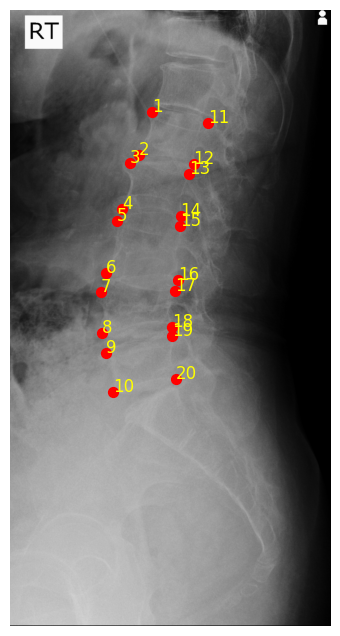

L1: 0.78, L2: 3.17, L3: 1.45, L4: 3.79, L5: 3.00
Processing 0013-M-022Y1.jpg


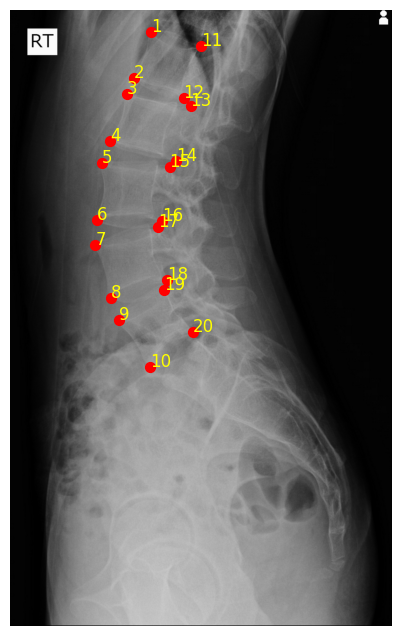

L1: 5.34, L2: 5.73, L3: 2.37, L4: 1.74, L5: 5.67
Processing 0007-F-006Y1.jpg


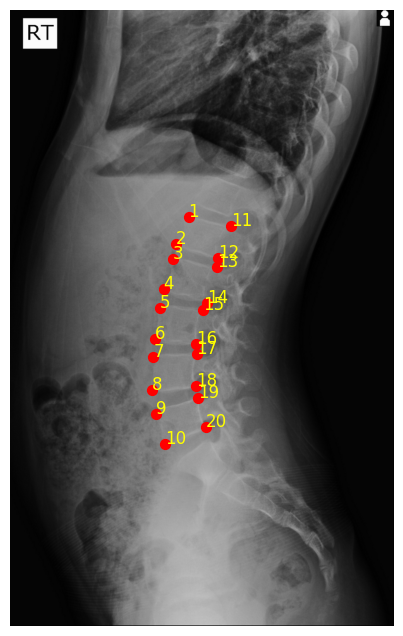

L1: 7.09, L2: 6.61, L3: 3.48, L4: 0.58, L5: 1.65
Processing 0014-F-062Y1.jpg


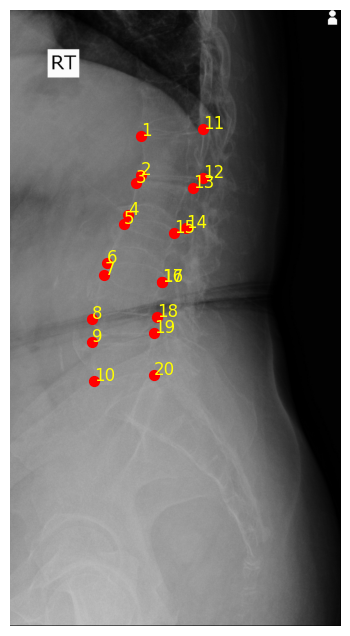

L1: 9.12, L2: 7.60, L3: 8.57, L4: 9.58, L5: 2.47
Processing 0004-F-010Y1.jpg


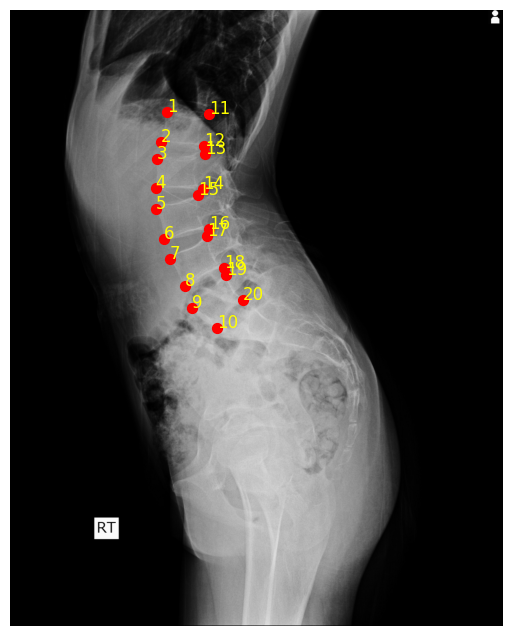

L1: 1.56, L2: 5.90, L3: 3.93, L4: 6.86, L5: 3.99
Processing 0006-F-031Y1.jpg
L1: 0.75, L2: 1.22, L3: 1.79, L4: 0.96, L5: 5.25
Processing 0005-F-025Y1.jpg
L1: 0.02, L2: 3.19, L3: 0.44, L4: 0.38, L5: 2.27
Processing 0008-M-022Y1.jpg
L1: 9.34, L2: 0.95, L3: 3.05, L4: 0.62, L5: 5.72
Processing 0015-M-020Y1.jpg
L1: 5.27, L2: 0.66, L3: 5.16, L4: 1.54, L5: 8.94
Processing 0003-F-013Y1.jpg
L1: 9.43, L2: 8.46, L3: 3.38, L4: 3.74, L5: 3.67
Processing 0012-F-013Y1.jpg
L1: 2.37, L2: 6.11, L3: 3.57, L4: 1.92, L5: 4.72
Processing 0009-F-038Y1.jpg
L1: 3.98, L2: 4.40, L3: 3.74, L4: 0.57, L5: 3.21
Processing 0001-F-037Y1.jpg
L1: 6.06, L2: 6.12, L3: 0.30, L4: 3.95, L5: 3.47
Processing 0010-F-037Y1.jpg
L1: 1.26, L2: 3.08, L3: 6.40, L4: 2.43, L5: 3.90
Processing 0023-F-014Y1.jpg
L1: 7.73, L2: 1.17, L3: 1.19, L4: 3.02, L5: 5.18
Processing 0024-F-014Y1.jpg
L1: 3.62, L2: 3.97, L3: 1.94, L4: 3.63, L5: 2.65
Processing 0021-F-079Y1.jpg
L1: 2.75, L2: 0.45, L3: 11.46, L4: 6.75, L5: 6.90
Processing 0029-M-019Y1.jp

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')

# CSV에서 좌표 데이터를 불러오는 함수 (마지막 row는 무시)
def read_csv_for_coordinates(c_path):
    df1 = pd.read_csv(c_path, sep=',', header=None)
    df1 = df1.iloc[:-1, :]  # 마지막 row 무시
    x_coords = list(df1[0]) + list(df1[2])  # (A 좌표들 + C 좌표들)
    y_coords = list(df1[1]) + list(df1[3])  # (B 좌표들 + D 좌표들)
    return x_coords, y_coords

# 이미지와 좌표 데이터를 이용해 점 찍기
def plot_image_with_points(image_path, x_coords, y_coords):
    # 이미지 로드
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR에서 RGB로 변환

    # 이미지 시각화
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)

    # 이미지 위에 좌표 찍기 (빨간색 점으로 시각화)
    plt.scatter(x_coords, y_coords, c='red', s=50)  # s는 점 크기, c는 색상

    # 좌표 확인을 위해 번호 표시
    for i, (x, y) in enumerate(zip(x_coords, y_coords)):
        plt.text(x, y, str(i+1), color="yellow", fontsize=12)

    # 시각화 결과 출력
    plt.axis('off')
    plt.show()

# 직선의 기울기 계산 함수
def calculate_slope(x1, y1, x2, y2):
    if x2 - x1 != 0:
        return (y2 - y1) / (x2 - x1)
    else:
        return np.inf  # 수직선의 경우 기울기 무한대로 처리

# 두 직선 간 각도 계산 함수
def calculate_angle_between_lines(x1, y1, x2, y2, x3, y3, x4, y4):
    slope1 = calculate_slope(x1, y1, x2, y2)
    slope2 = calculate_slope(x3, y3, x4, y4)
    if slope1 != np.inf and slope2 != np.inf:
        angle_radians = np.arctan(abs((slope2 - slope1) / (1 + slope1 * slope2)))
        angle_degrees = np.degrees(angle_radians)
        return angle_degrees
    else:
        return 90  # 수직선인 경우 90도로 처리

# 이미지 파일에 대해 각도를 계산하고 결과 출력
def process_images_and_calculate_angles(image_folder, csv_folder):
    angles_results = []
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg"):
            img_path = os.path.join(image_folder, filename)
            csv_name = filename.replace('.jpg', '.csv')
            c_path = os.path.join(csv_folder, csv_name)

            if os.path.exists(c_path):  # CSV 파일이 존재할 때만 처리
                x_coords, y_coords = read_csv_for_coordinates(c_path)
                print(f"Processing {filename}")

                # L1: 1-11과 2-12 직선 사이의 각도
                L1_angle = calculate_angle_between_lines(x_coords[0], y_coords[0], x_coords[10], y_coords[10],
                                                         x_coords[1], y_coords[1], x_coords[11], y_coords[11])

                # L2: 3-13과 4-14 직선 사이의 각도
                L2_angle = calculate_angle_between_lines(x_coords[2], y_coords[2], x_coords[12], y_coords[12],
                                                         x_coords[3], y_coords[3], x_coords[13], y_coords[13])

                # L3: 5-15과 6-16 직선 사이의 각도
                L3_angle = calculate_angle_between_lines(x_coords[4], y_coords[4], x_coords[14], y_coords[14],
                                                         x_coords[5], y_coords[5], x_coords[15], y_coords[15])

                # L4: 7-17과 8-18 직선 사이의 각도
                L4_angle = calculate_angle_between_lines(x_coords[6], y_coords[6], x_coords[16], y_coords[16],
                                                         x_coords[7], y_coords[7], x_coords[17], y_coords[17])

                # L5: 9-19과 10-20 직선 사이의 각도
                L5_angle = calculate_angle_between_lines(x_coords[8], y_coords[8], x_coords[18], y_coords[18],
                                                         x_coords[9], y_coords[9], x_coords[19], y_coords[19])

                # 결과 저장
                angles_results.append([filename, L1_angle, L2_angle, L3_angle, L4_angle, L5_angle])

                # 첫 5개의 이미지는 시각화
                if len(angles_results) <= 5:
                    plot_image_with_points(img_path, x_coords, y_coords)

                # 각도 출력
                print(f"L1: {L1_angle:.2f}, L2: {L2_angle:.2f}, L3: {L3_angle:.2f}, L4: {L4_angle:.2f}, L5: {L5_angle:.2f}")

    return angles_results

# Google Drive의 LA 폴더 경로 설정
image_folder = '/content/drive/My Drive/LA/'  # Google Drive의 LA 폴더 경로
csv_folder = '/content/drive/My Drive/LA/'  # CSV 파일이 있는 동일한 폴더 경로

# 이미지와 좌표 데이터를 시각화하고 각도를 계산
angles_results = process_images_and_calculate_angles(image_folder, csv_folder)

# 주석 처리된 CSV 저장 부분
df = pd.DataFrame(angles_results, columns=['image_name', 'L1', 'L2', 'L3', 'L4', 'L5'])
df.to_csv('/content/drive/MyDrive/angles_results_LA.csv', index=False)
print("CSV 파일이 저장되었습니다.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


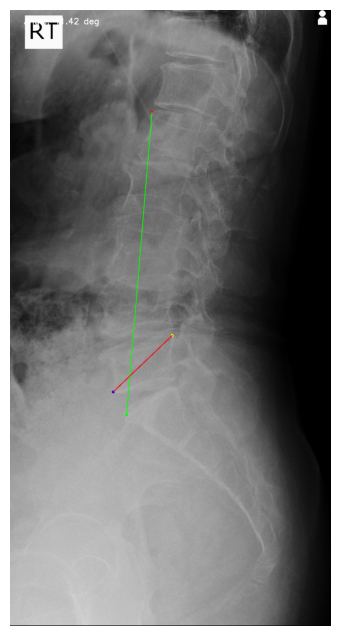

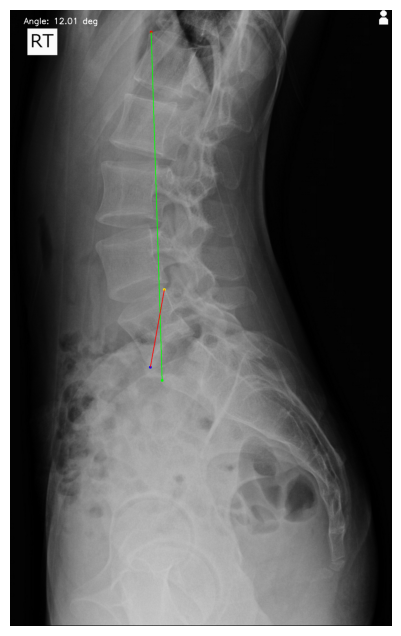

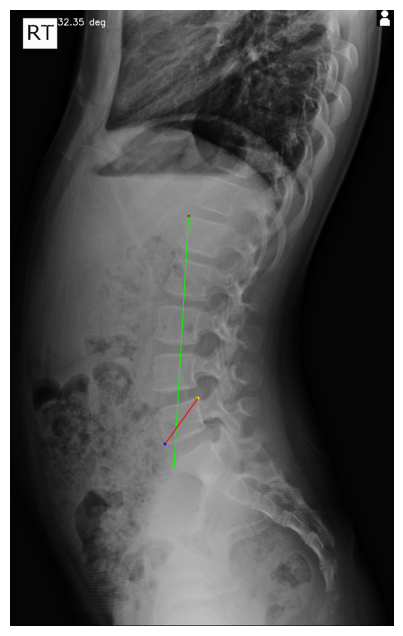

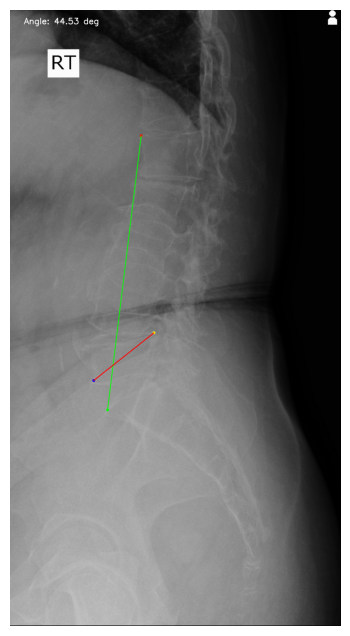

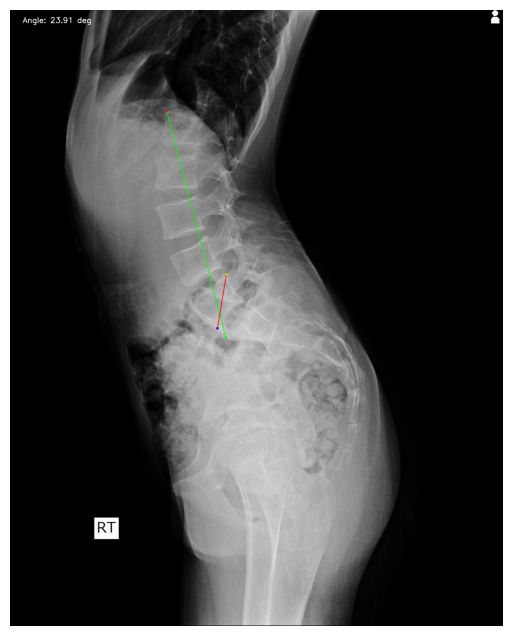

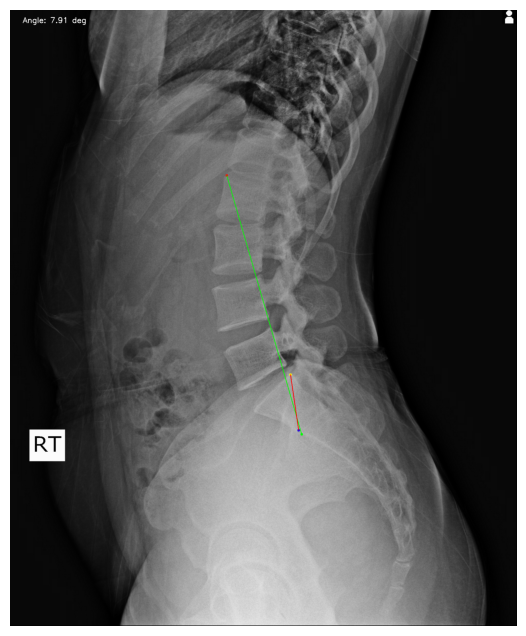

KeyboardInterrupt: 

In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Google Drive 마운트
drive.mount('/content/drive')

# 직선의 기울기 계산 함수
def calculate_slope(x1, y1, x2, y2):
    if x2 - x1 != 0:  # x 좌표가 같은 경우 기울기를 계산할 수 없으므로 처리
        return (y2 - y1) / (x2 - x1)
    else:
        return np.inf  # 수직선의 경우 기울기를 무한대로 설정

# 1번과 11번 직선, 10번과 20번 직선 간의 각도 계산 및 이미지 시각화
def calculate_and_visualize_angle(x_coords, y_coords, img):
    # 1번 점과 11번 점 연결한 직선의 기울기 계산
    slope_1_11 = calculate_slope(x_coords[0], y_coords[0], x_coords[10], y_coords[10])

    # 10번 점과 20번 점 연결한 직선의 기울기 계산
    slope_10_20 = calculate_slope(x_coords[9], y_coords[9], x_coords[19], y_coords[19])

    # 두 직선 사이의 각도 계산
    if slope_1_11 != np.inf and slope_10_20 != np.inf:
        angle_radians = np.arctan(abs((slope_10_20 - slope_1_11) / (1 + slope_1_11 * slope_10_20)))
        angle_degrees = np.degrees(angle_radians)
    else:
        angle_degrees = 90  # 수직선이 있는 경우 두 직선이 수직인 것으로 처리 (90도)

    # 이미지에 점과 직선 그리기
    img_copy = img.copy()

    # 점 그리기 (1번, 11번, 10번, 20번)
    points = [(x_coords[0], y_coords[0]), (x_coords[10], y_coords[10]),
              (x_coords[9], y_coords[9]), (x_coords[19], y_coords[19])]
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0)]  # 각 점의 색상 설정

    for i, point in enumerate(points):
        cv2.circle(img_copy, (int(point[0]), int(point[1])), 5, colors[i], -1)

    # 직선 그리기 (1번-11번, 10번-20번)
    cv2.line(img_copy, (int(x_coords[0]), int(y_coords[0])), (int(x_coords[10]), int(y_coords[10])), (0, 255, 0), 2)
    cv2.line(img_copy, (int(x_coords[9]), int(y_coords[9])), (int(x_coords[19]), int(y_coords[19])), (255, 0, 0), 2)

    # 각도 표시
    cv2.putText(img_copy, f"Angle: {angle_degrees:.2f} deg", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    return img_copy, angle_degrees

# CSV에서 좌표 데이터를 불러오는 함수
def read_csv_for_coordinates(c_path):
    df1 = pd.read_csv(c_path, sep=',', header=None)
    x_coords = list(df1[0]) + list(df1[2])  # (A 좌표들 + C 좌표들)
    y_coords = list(df1[1]) + list(df1[3])  # (B 좌표들 + D 좌표들)
    return x_coords, y_coords

# 모든 이미지 파일에 대해 각도를 계산하고 시각화하는 함수
def process_images_and_calculate_angles(image_folder, csv_folder):
    result = {}
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg"):
            img_path = os.path.join(image_folder, filename)
            csv_name = filename.replace('.jpg', '.csv')
            c_path = os.path.join(csv_folder, csv_name)

            if os.path.exists(c_path):  # CSV 파일이 존재할 때만 처리
                x_coords, y_coords = read_csv_for_coordinates(c_path)

                # 이미지 로드
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 이미지를 RGB로 변환

                # 각도 계산 및 시각화
                img_with_lines, angle = calculate_and_visualize_angle(x_coords, y_coords, img)

                # 이미지와 각도 저장
                result[filename] = angle

                # 이미지 시각화
                plt.figure(figsize=(8, 8))
                plt.imshow(img_with_lines)
                plt.axis('off')
                plt.show()

            else:
                print(f"CSV 파일이 존재하지 않습니다: {c_path}")

    return result

# Google Drive의 AP 폴더 경로 설정
image_folder = '/content/drive/My Drive/LA/'  # Google Drive의 LA 폴더 경로
csv_folder = '/content/drive/My Drive/LA/'  # CSV 파일이 있는 동일한 폴더 경로

# 각도 계산 함수 실행
angles_dict = process_images_and_calculate_angles(image_folder, csv_folder)

# 각도 결과 출력
for filename, angle in angles_dict.items():
    print(f"{filename}: {angle:.2f}도")


In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import math

# Google Drive 마운트
drive.mount('/content/drive')

# 직선의 기울기 계산 함수
def calculate_slope(x1, y1, x2, y2):
    return (y2 - y1) / (x2 - x1)

# 모든 직선에 대해 수평선과의 각도를 계산하는 함수
def calculate_angles(x_coords, y_coords):
    angles = []
    for i in range(10):  # 1-11, 2-12, ... 10-20 형태로 직선을 연결
        slope = calculate_slope(x_coords[i], y_coords[i], x_coords[i + 10], y_coords[i + 10])
        angle_radians = np.arctan(slope)  # 기울기를 기반으로 수평선과의 각도 계산
        angle_degrees = np.degrees(angle_radians)  # 도(degree) 단위로 변환
        angles.append(angle_degrees)
    return angles

# CSV에서 좌표 데이터를 불러오는 함수
def read_csv_for_coordinates(c_path):
    df1 = pd.read_csv(c_path, sep=',', header=None)
    x_coords = list(df1[0]) + list(df1[2])  # (A 좌표들 + C 좌표들)
    y_coords = list(df1[1]) + list(df1[3])  # (B 좌표들 + D 좌표들)
    return x_coords, y_coords

# 모든 이미지 파일에 대해 각도를 계산하는 함수
def process_images_and_calculate_angles(image_folder, csv_folder):
    result = {}
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg"):
            img_path = os.path.join(image_folder, filename)
            csv_name = filename.replace('.jpg', '.csv')
            c_path = os.path.join(csv_folder, csv_name)

            if os.path.exists(c_path):  # CSV 파일이 존재할 때만 처리
                x_coords, y_coords = read_csv_for_coordinates(c_path)
                angles = calculate_angles(x_coords, y_coords)
                max_angle = max(angles)
                min_angle = min(angles)
                angle_difference = max_angle - min_angle

                # 결과 저장 (파일 이름: 각도)
                result[filename] = angle_difference
            else:
                print(f"CSV 파일이 존재하지 않습니다: {c_path}")

    return result

# Google Drive의 AP 폴더 경로 설정
image_folder = '/content/drive/My Drive/AP/'  # Google Drive의 AP 폴더 경로
csv_folder = '/content/drive/My Drive/AP/'  # CSV 파일이 있는 동일한 폴더 경로

# 각도 계산 함수 실행
angles_dict = process_images_and_calculate_angles(image_folder, csv_folder)

# 각도 결과 출력
for filename, angle in angles_dict.items():
    print(f"{filename}: {angle:.2f}도")


Mounted at /content/drive
0009-F-038Y0.jpg: 24.59도
0006-F-031Y0.jpg: 11.22도
0005-F-025Y0.jpg: 24.52도
0004-F-010Y0.jpg: 12.52도
0008-M-022Y0.jpg: 5.11도
0010-F-037Y0.jpg: 15.97도
0012-F-013Y0.jpg: 3.31도
0014-F-062Y0.jpg: 29.77도
0013-M-022Y0.jpg: 20.33도
0007-F-006Y0.jpg: 5.76도
0003-F-013Y0.jpg: 14.44도
0011-F-063Y0.jpg: 15.51도
0001-F-037Y0.jpg: 4.76도
0016-F-023Y0.jpg: 15.44도
0015-M-020Y0.jpg: 42.42도
0018-F-020Y0.jpg: 7.48도
0019-F-015Y0.jpg: 26.82도
0026-F-029Y0.jpg: 18.92도
0020-M-030Y0.jpg: 5.63도
0029-M-019Y0.jpg: 7.36도
0023-F-014Y0.jpg: 3.95도
0021-F-079Y0.jpg: 26.79도
0025-F-015Y0.jpg: 27.90도
0022-M-006Y0.jpg: 3.96도
0017-F-040Y0.jpg: 3.47도
0028-F-041Y0.jpg: 9.03도
0031-F-014Y0.jpg: 3.00도
0024-F-014Y0.jpg: 3.29도
0043-F-039Y0.jpg: 22.78도
0044-F-022Y0.jpg: 26.98도
0037-F-019Y0.jpg: 23.33도
0046-F-021Y0.jpg: 23.07도
0048-F-020Y0.jpg: 3.49도
0041-F-019Y0.jpg: 21.32도
0036-F-016Y0.jpg: 17.29도
0040-M-023Y0.jpg: 4.90도
0032-F-007Y0.jpg: 10.10도
0035-M-026Y0.jpg: 11.10도
0033-F-023Y0.jpg: 17.57도
0042-F-019Y0.j

# LA&AP_Cobb Angle

In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import math

# Google Drive 마운트
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 두 점을 받아 기울기를 계산하는 함수
def calculate_slope(point1, point2):
    # 기울기 = (y2 - y1) / (x2 - x1)
    if point2[0] == point1[0]:  # x1 == x2인 경우 기울기가 무한대임 (수직선)
        return np.inf
    return (point2[1] - point1[1]) / (point2[0] - point1[0])

# 두 직선의 기울기를 받아 각도를 계산하는 함수
def calculate_angle_between_lines(slope1, slope2):
    if slope1 == slope2:
        return 0  # 평행
    elif slope1 == np.inf or slope2 == np.inf:
        return 90  # 수직

    # 기울기를 이용한 두 직선 사이의 각도 계산
    tan_theta = abs((slope2 - slope1) / (1 + slope1 * slope2))
    angle_radians = np.arctan(tan_theta)  # 각도를 라디안으로 계산
    angle_degrees = np.degrees(angle_radians)  # 라디안을 도로 변환
    return angle_degrees

In [ ]:
import zipfile

# zip 파일 경로
zip_file_path = '/content/drive/MyDrive/BUU-LSPINE_400.zip'

# 압축을 풀 폴더 경로
extract_folder = '/content/spine_data_400'

# 압축 파일 열기 및 추출
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

In [ ]:
# 추출된 BUU-LSPINE_400 폴더로 들어가기
buu_folder = os.path.join(extract_folder, 'BUU-LSPINE_400')

import glob
from PIL import Image

!pip install openpyxl

# AP 폴더 경로와 LA 폴더 경로 설정
ap_folder = os.path.join(buu_folder, 'AP')
la_folder = os.path.join(buu_folder, 'LA')

In [ ]:
excel_file_path = os.path.join(buu_folder, 'BUU-LSPINE_400_report.xlsx')

# 'pos_AP_BUU-LSPINE_400' 불러오기
ap_sheet = 'pos_AP_BUU-LSPINE_400'
ap_df = pd.read_excel(excel_file_path, sheet_name=ap_sheet)

la_sheet = 'pos_LA_BUU-LSPINE_400'
la_df = pd.read_excel(excel_file_path, sheet_name=la_sheet)

## AP Cobb angle

In [ ]:
import pandas as pd
import numpy as np

# 두 점을 받아 기울기를 계산하는 함수
def calculate_slope(point1, point2):
    # 기울기 = (y2 - y1) / (x2 - x1)
    if point2[0] == point1[0]:  # x1 == x2인 경우 기울기가 무한대임 (수직선)
        return np.inf
    return (point2[1] - point1[1]) / (point2[0] - point1[0])

# 각 행에서 기울기를 계산하는 함수
def calculate_slopes(row):
    # 첫 번째 직선: (x1, y1)와 (x2, y2)
    x1, y1 = row['L1a_1c'], row['L1a_1r']
    x2, y2 = row['L1a_2c'], row['L1a_2r']

    # 두 번째 직선: (x3, y3)와 (x4, y4)
    x3, y3 = row['L5b_1c'], row['L5b_1r']
    x4, y4 = row['L5b_2c'], row['L5b_2r']

    # 기울기 계산
    slope1 = calculate_slope((x1, y1), (x2, y2))
    slope2 = calculate_slope((x3, y3), (x4, y4))

    angle = calculate_angle_between_lines(slope1, slope2)

    return pd.Series({'slope1': slope1, 'slope2': slope2, 'cob' : angle})

# 새로운 컬럼 추가: 각 행마다 기울기를 계산
ap_df[['slope1', 'slope2', 'cob']] = ap_df.apply(calculate_slopes, axis=1)

# 결과 확인
print(ap_df[['filename', 'slope1', 'slope2','cob']].head())

       filename    slope1    slope2        cob
0  0001-F-037Y0  0.007246 -0.017315   1.407168
1  0003-F-013Y0 -0.191663  0.044502  13.398040
2  0004-F-010Y0 -0.036364  0.132124   9.609110
3  0005-F-025Y0 -0.141892  0.059796  11.497885
4  0006-F-031Y0 -0.177632  0.013170  10.827016


In [ ]:
# 필요한 열만 선택하여 CSV로 저장
output_df = ap_df[['filename', 'slope1', 'slope2', 'cob']]

# CSV 파일로 저장
output_df.to_csv('output_slope_cob.csv', index=False)

print("CSV 파일이 성공적으로 저장되었습니다.")

CSV 파일이 성공적으로 저장되었습니다.


In [ ]:
import pandas as pd
import numpy as np

# 두 점을 받아 기울기를 계산하는 함수
def calculate_slope(point1, point2):
    # 기울기 = (y2 - y1) / (x2 - x1)
    if point2[0] == point1[0]:  # x1 == x2인 경우 기울기가 무한대
        return np.inf
    return (point2[1] - point1[1]) / (point2[0] - point1[0])

# 각 행에서 기울기를 계산하는 함수
def calculate_slopes(row):
    # 첫 번째 직선: (x1, y1)와 (x2, y2)
    x1, y1 = row['L1a_1c'], row['L1a_1r']
    x2, y2 = row['L1a_2c'], row['L1a_2r']

    # 두 번째 직선: (x3, y3)와 (x4, y4)
    x3, y3 = row['L5b_1c'], row['L5b_1r']
    x4, y4 = row['L5b_2c'], row['L5b_2r']

    # 기울기 계산
    slope1 = calculate_slope((x1, y1), (x2, y2))
    slope2 = calculate_slope((x3, y3), (x4, y4))

    angle = calculate_angle_between_lines(slope1, slope2)

    return pd.Series({'slope1': slope1, 'slope2': slope2, 'cob' : angle})

# 새로운 컬럼 추가: 각 행마다 기울기를 계산
la_df[['slope1', 'slope2', 'cob']] = la_df.apply(calculate_slopes, axis=1)

# 결과 확인
print(la_df[['filename', 'slope1', 'slope2','cob']].head())

       filename    slope1    slope2        cob
0  0001-F-037Y1  0.109538 -0.224806  18.920955
1  0003-F-013Y1  0.344828 -0.283236  34.839644
2  0004-F-010Y1  0.063079 -1.129039  52.077757
3  0005-F-025Y1  0.215053 -0.622641  44.044884
4  0006-F-031Y1  0.127371 -1.130038  55.752277


In [ ]:
# 필요한 열만 선택하여 CSV로 저장
output_df = la_df[['filename', 'slope1', 'slope2', 'cob']]

# CSV 파일로 저장
output_df.to_csv('LA_cobb angle.csv', index=False)

print("CSV 파일이 성공적으로 저장되었습니다.")

CSV 파일이 성공적으로 저장되었습니다.
